# This script contains the following:
- Import libraries
- Load datasets
- Checking dataframes
- Wrangling customer dataframe
    - Modify column names
    - Dropping first_name column
- Data Quality and Consistency Checks
    - Outliers check
    - mixed types check
    - missing value check
    - duplicate check
- Combining customer & order_products dataframe  
- Export


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Load dataframes

In [8]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data_Analyst/Course_Career_foundry/A4_Python/2023.08_Instacart_basket_analysis/02_data/'
customers_file_path = os.path.join(path, 'original data', 'customers.csv')
order_prods_aggregated = os.path.join(path, 'prepared data', 'orders_products_aggregated.pkl')

# Import the dataframe
df_cust = pd.read_csv(customers_file_path)
df_ords = pd.read_pickle(order_prods_aggregated)

# Checking dataframes 

In [9]:
# checking customer dataframe
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [10]:
df_cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [11]:
# Checking orders & products aggregated dataframe
df_ords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32404859 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   number_order_client     int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_price              float64
 20  spending_flag           object 
 21  median_days             float64
 2

In [12]:
df_ords.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,mid-range product,regularly busy,Regularly busy,Average orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,mid-range product,regularly busy,Least busy days,Average orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,mid-range product,regularly busy,Least busy days,Most orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,mid-range product,least busy,Least busy days,Average orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,mid-range product,least busy,Least busy days,Most orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer


# Wrangling customer dataframe

In [13]:
# Describe customer dataframe
round(df_cust.describe())

,user_id,Age,n_dependants,income
count,206209.0,206209.0,206209.0,206209.0
mean,103105.0,50.0,1.0,94633.0
std,59528.0,18.0,1.0,42474.0
min,1.0,18.0,0.0,25903.0
25%,51553.0,33.0,0.0,59874.0
50%,103105.0,49.0,1.0,93547.0
75%,154657.0,66.0,3.0,124244.0
max,206209.0,81.0,3.0,593901.0


In [14]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


NOTE: it appears that First name column have null values

In [15]:
# Finding count of missing values for column 'First Name'
df_cust['First Name'].isnull().sum()

11259

NOTE: the first_name column shows 11259 null values but could be ignored. Then only use the surname and user_id to define the customers

## Modify column names

In [16]:
# Change all column names to lowercase
df_cust.columns = df_cust.columns.str.lower()

# Display the DataFrame with lowercase column names
print(df_cust.head())

   user_id first name    surnam  gender       state  age date_joined  \
0    26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
1    33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
2    65803    Kenneth    Farley    Male       Idaho   35    1/1/2017   
3   125935   Michelle     Hicks  Female        Iowa   40    1/1/2017   
4   130797        Ann   Gilmore  Female    Maryland   26    1/1/2017   

   n_dependants fam_status  income  
0             3    married  165665  
1             0     single   59285  
2             2    married   99568  
3             0     single   42049  
4             1    married   40374  


In [17]:
# Rename specific columns
df_cust.rename(columns={'first name': 'first_name', 'surnam': 'surname'}, inplace=True)

In [18]:
# Checking renaming columns
df_cust.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


## Dropping first_name column


In [19]:
# Drop the 'first_name' column
df_cust.drop(columns='first_name', inplace=True)

# Display the DataFrame after dropping the column
print(df_cust)


        user_id   surname  gender           state  age date_joined  \
0         26711  Esquivel  Female        Missouri   48    1/1/2017   
1         33890      Hart  Female      New Mexico   36    1/1/2017   
2         65803    Farley    Male           Idaho   35    1/1/2017   
3        125935     Hicks  Female            Iowa   40    1/1/2017   
4        130797   Gilmore  Female        Maryland   26    1/1/2017   
...         ...       ...     ...             ...  ...         ...   
206204   168073      Case  Female  North Carolina   44    4/1/2020   
206205    49635   Robbins    Male          Hawaii   62    4/1/2020   
206206   135902  Richmond  Female        Missouri   66    4/1/2020   
206207    81095   Rollins  Female      California   27    4/1/2020   
206208    80148     Noble  Female        New York   55    4/1/2020   

        n_dependants fam_status  income  
0                  3    married  165665  
1                  0     single   59285  
2                  2    married  

# Data Quality and Consistency Checks


## Outliers check

In [20]:
# Checking for outliers
round(df_cust.describe())

,user_id,age,n_dependants,income
count,206209.0,206209.0,206209.0,206209.0
mean,103105.0,50.0,1.0,94633.0
std,59528.0,18.0,1.0,42474.0
min,1.0,18.0,0.0,25903.0
25%,51553.0,33.0,0.0,59874.0
50%,103105.0,49.0,1.0,93547.0
75%,154657.0,66.0,3.0,124244.0
max,206209.0,81.0,3.0,593901.0


<Axes: title={'center': 'income'}, xlabel='gender'>

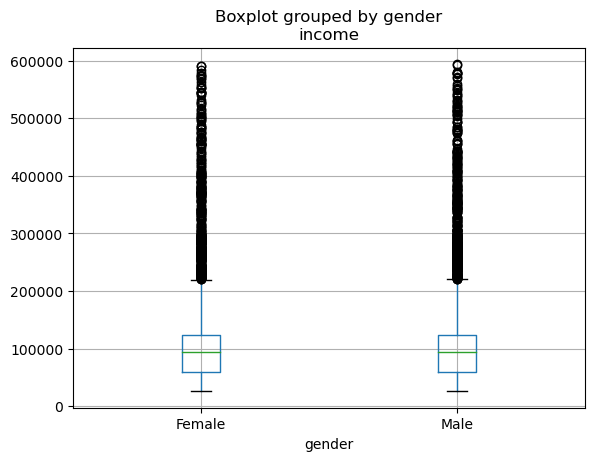

In [21]:
# Create a boxplot of 'income' column grouped by gender
df_cust.boxplot(column='income', by='gender')

## Mixed types check

In [22]:

# Check for mixed-types in customers dataframe
for col in df_cust.columns.tolist():
    weird = (df_cust[[col]].applymap(type) != df_cust[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df_cust[weird]) > 0:
        print(col)


### NOTE: the result prints no result. we have no mixed type issues

## Missing values check

In [23]:
# Checking for null values
null_counts = df_cust.isnull().sum()
null_counts

user_id         0
surname         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

NOTE: null values of the first_name have been ignored by dropping the column from the dataframe

## Duplicate check

In [24]:
# Check for duplicates
duplicate_rows = df_cust[df_cust.duplicated()]
duplicate_rows

,user_id,surname,gender,state,age,date_joined,n_dependants,fam_status,income


NOTE: no duplicate rows

<Axes: ylabel='Frequency'>

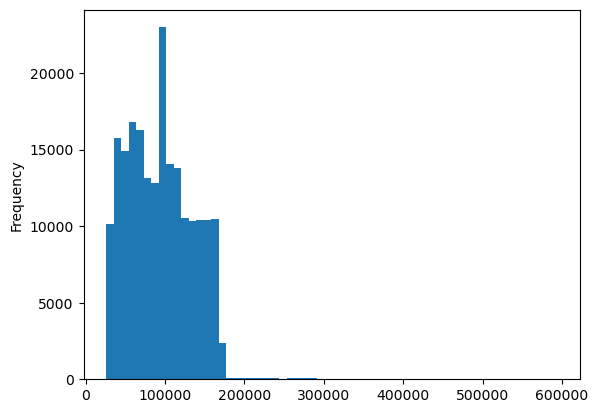

In [25]:
df_cust['income'].plot.hist(bins = 60)

by creating a bar plot we can see the distribution of incomes.


# Combining customer & order_products dataframe  

In [26]:
# Checking dataframes for merging
df_ords.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,mid-range product,regularly busy,Regularly busy,Average orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,mid-range product,regularly busy,Least busy days,Average orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,mid-range product,regularly busy,Least busy days,Most orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,mid-range product,least busy,Least busy days,Average orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,mid-range product,least busy,Least busy days,Most orders,10,new customer,6.367797,Low spender,20.5,Non-frequent customer


In [27]:
# Checking dataframes for merging
df_cust.head()

,user_id,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [28]:
# Merging the 2 dataframes customer and order_product
df_all = df_ords.merge(df_cust, on = 'user_id', indicator = True)

In [29]:
# Checking merging
df_all.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [30]:
# Remove the unecessary _merge column
df_all.drop(columns=['_merge'], inplace=True)

In [31]:
# checking the result of merging and dropped _merge column
df_all.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

# Export dataframe

In [32]:
# exporting in pickle format
df_all.to_pickle(os.path.join(path,'prepared data','all_data'))